# Table of Contents:
Given a patient, time periods, and certain channels, we can explore the eigenspectrum, adjacency matrix and raw iEEG data.

* Import And Analyze Data <a href='#section1'>Link</a>
* Raw iEEG Data <a href='#section2'>Link</a>


In [1]:
import pandas as pd
import numpy as np
import json
import os
from IPython.display import display

import scipy, scipy.io


import matplotlib
from matplotlib import *
from matplotlib import pyplot as plt
import itertools
from mpl_toolkits.axes_grid1 import make_axes_locatable
# pretty charting
import seaborn as sns
sns.set_palette('muted')
sns.set_style('darkgrid')
from natsort import natsorted, ns

%matplotlib inline


## sklearn imports
import sklearn.linear_model
import sklearn.cross_validation
import sklearn.tree
import sklearn.ensemble
import sklearn.preprocessing
import sklearn.feature_selection
import sklearn.pipeline
import sklearn.grid_search

# Import And Analyze Data
<a id="section1"></a>

In [35]:
# parameters
radii = [1.1, 1.2, 1.5, 2]
threshold = 0.8
perturbation = 'R'
patients = ['pt1sz2', 'pt1sz3', 'pt2sz1', 'pt2sz3', 'pt7sz19', 'pt7sz21', 'pt7sz22', \
           'JH105sz1']

dataDir = '../adj_mats_win500_step500_freq1000/'

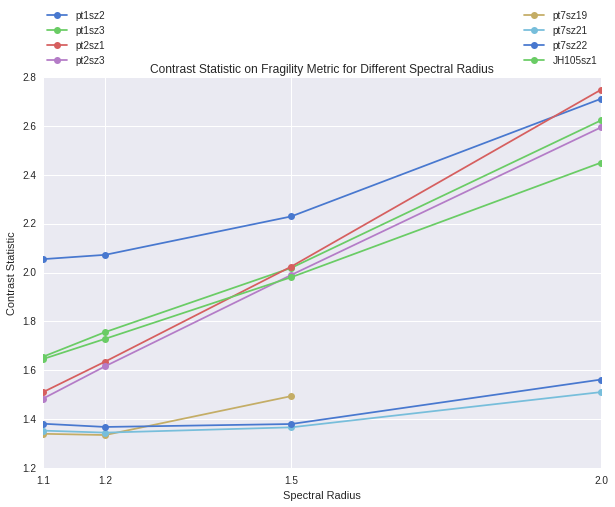

In [36]:
fig = plt.figure(figsize=(10,7))
axes = plt.gca()
for patient in patients:
    contrastStatList = [] # initialize empty list per patient
    
    for radius in radii:
        # set directory path to the datafile and load it
        perturbationDir = os.path.join(dataDir, perturbation+'_finaldata_radius'+str(radius))
        dataFile = os.path.join(perturbationDir, patient+'final_data.mat')
        data = scipy.io.loadmat(dataFile, squeeze_me=True, struct_as_record=False)
        
        # analyze the fragility metric matrix
        fragility_rankings = data['fragility_rankings']
        
        # pixels>thresh / #pixels>thresh
        avgeAboveThresh = np.sum(fragility_rankings[fragility_rankings>=threshold]) / \
                                fragility_rankings[fragility_rankings>=threshold].size
        avgeBelowThresh = np.sum(fragility_rankings[fragility_rankings<threshold]) / \
                                fragility_rankings[fragility_rankings<threshold].size
        
        contrastStatList.append(avgeAboveThresh/avgeBelowThresh)

    # plot the contrast statistic
    plt.plot(radii, contrastStatList, '-o', label=patient)
plt.xlabel('Spectral Radius')
plt.ylabel('Contrast Statistic')
plt.title('Contrast Statistic on Fragility Metric for Different Spectral Radius')
plt.xticks(radii)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102),loc=3,
           ncol=2,  mode="expand",borderaxespad=0.)


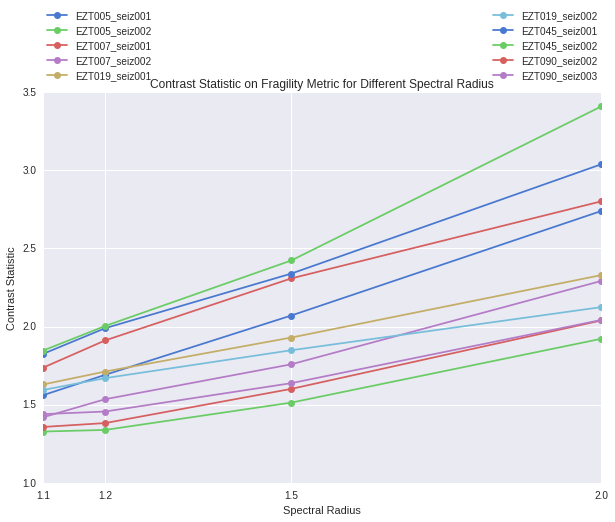

In [37]:
patients = [ 'EZT005_seiz001', 'EZT005_seiz002', 'EZT007_seiz001', 'EZT007_seiz002',\
           'EZT019_seiz001', 'EZT019_seiz002', 'EZT045_seiz001', 'EZT045_seiz002', 'EZT090_seiz002', 'EZT090_seiz003']

fig = plt.figure(figsize=(10,7))
axes = plt.gca()
for patient in patients:
    contrastStatList = [] # initialize empty list per patient
    
    for radius in radii:
        # set directory path to the datafile and load it
        perturbationDir = os.path.join(dataDir, perturbation+'_finaldata_radius'+str(radius))
        dataFile = os.path.join(perturbationDir, patient+'final_data.mat')
        data = scipy.io.loadmat(dataFile, squeeze_me=True, struct_as_record=False)
        
        # analyze the fragility metric matrix
        fragility_rankings = data['fragility_rankings']
        
        # pixels>thresh / #pixels>thresh
        avgeAboveThresh = np.sum(fragility_rankings[fragility_rankings>=threshold]) / \
                                fragility_rankings[fragility_rankings>=threshold].size
        avgeBelowThresh = np.sum(fragility_rankings[fragility_rankings<threshold]) / \
                                fragility_rankings[fragility_rankings<threshold].size
        
        contrastStatList.append(avgeAboveThresh/avgeBelowThresh)

    # plot the contrast statistic
    plt.plot(radii, contrastStatList, '-o', label=patient)
plt.xlabel('Spectral Radius')
plt.ylabel('Contrast Statistic')
plt.title('Contrast Statistic on Fragility Metric for Different Spectral Radius')
plt.xticks(radii)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102),loc=3,
           ncol=2,  mode="expand",borderaxespad=0.)


## Discussion on Contrast Statistic:
Contrast statistic generally trends upwards as the spectral radius for the perturbation is increased. This is not true for pt7 of NIH.

The contrast statistic measures the ratio between the weight of the pixels > threshold vs. the weight of the pixels < threshold. The greater it is means the higher the sum of the pixels > threshold